In [ ]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn

## 2.1 Plot $y = -3x^2 + 72x + 70$.

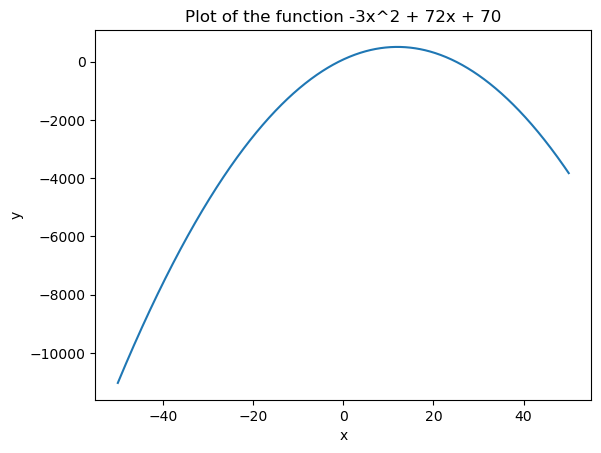

In [33]:
# Your code here
x = np.linspace(-50, 50, 1000)

# calculate the y value for each element of the x vector
y = -3*x**2 + 72*x + 70

fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of the function -3x^2 + 72x + 70')
ax.plot(x, y)

## 2.3 Plot $f(x_1, x_2)$.

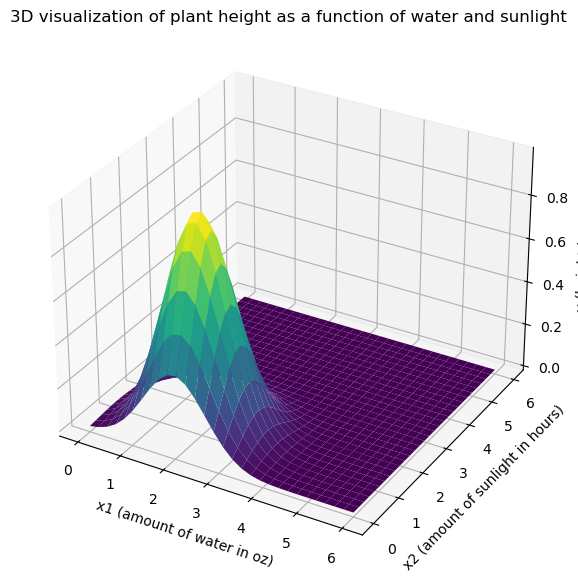

In [35]:
# define the multivariate function
def plant_height(x1, x2):
    return np.exp(-(x1 - 2)**2 - (x2 - 1)**2)

# Create a grid of x1 and x2 values
x1_values = np.linspace(0, 6, 30)
x2_values = np.linspace(0, 6, 30)
x1, x2 = np.meshgrid(x1_values, x2_values)
y = plant_height(x1, x2)

# Create a 3D plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(x1, x2, y, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

# Set labels and titles
ax.set_xlabel('x1 (amount of water in oz)')
ax.set_ylabel('x2 (amount of sunlight in hours)')
ax.set_zlabel('y (height in mm)')
ax.set_title('3D visualization of plant height as a function of water and sunlight')

# Show the plot
plt.show()

## 3.1(a) Draw from joint distribution of $(S, W)$ and generate bivariate histogram.

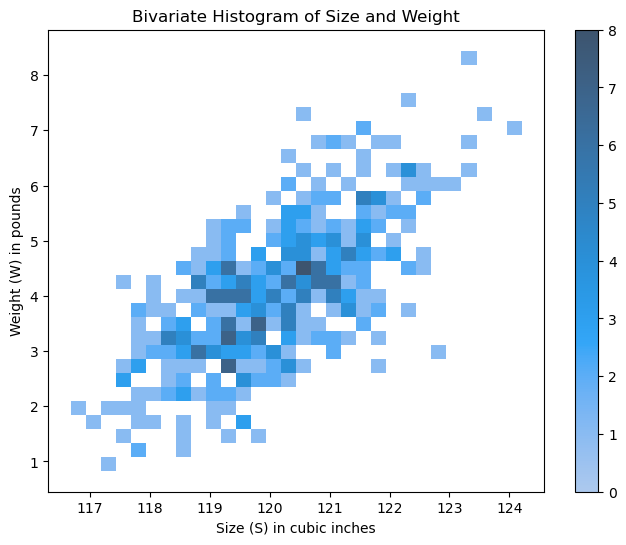

In [63]:
# Define the mean and covariance matrix for the distribution
mu = np.array([120, 4])
cov = np.array([[1.5, 1], [1, 1.5]])

# Create a multivariate normal distribution instance
bivariate_normal_distribution = mvn(mean=mu, cov=cov)

# Sample 500 times from the joint normal distribution
bivariate_gauss = bivariate_normal_distribution.rvs(size=500)

# Create a DataFrame for the samples
df_samples = pd.DataFrame(bivariate_gauss, columns=['Size (S)', 'Weight (W)'])

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Use seaborn's histplot to create a bivariate histogram
sns.histplot(df_samples, x="Size (S)", y="Weight (W)", bins=30, cbar=True)

# Set the titles and labels
plt.title('Bivariate Histogram of Size and Weight')
plt.xlabel('Size (S) in cubic inches')
plt.ylabel('Weight (W) in pounds')

# Show the plot
plt.show()


## 3.2 Plot the joint PDFs at $S=118$ and $S=122$, varying $W$.

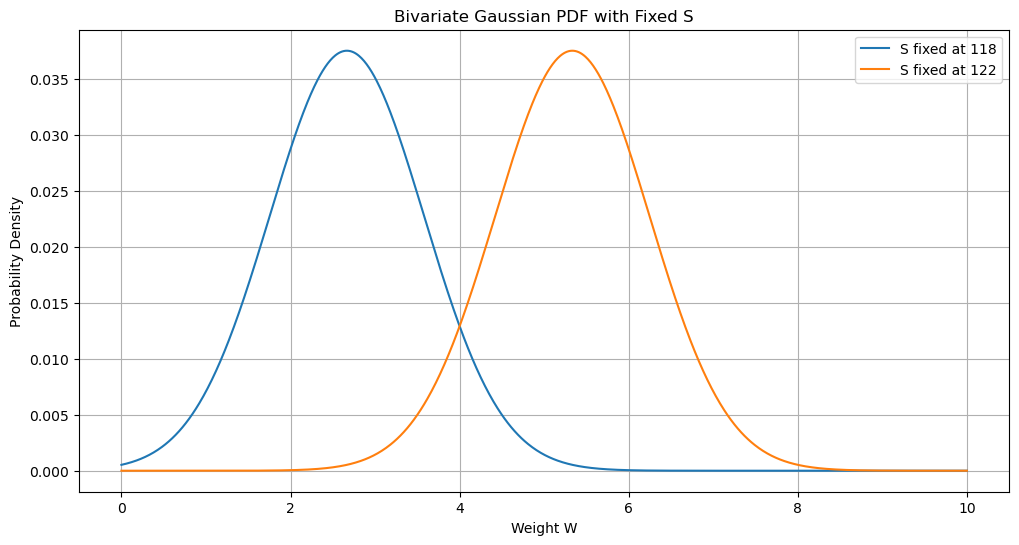

In [66]:
# Create a range of 1001 evenly-spaced values of W between 0 and 10
W_values = np.linspace(0, 10, 1001)

# Evaluate the PDF for S fixed at 118
fixed_S1 = 118
pdf_S1 = mvn(mu, cov).pdf(np.dstack((np.full(W_values.shape, fixed_S1), W_values))[0])

# Evaluate the PDF for S fixed at 122
fixed_S2 = 122
pdf_S2 = mvn(mu, cov).pdf(np.dstack((np.full(W_values.shape, fixed_S2), W_values))[0])

# Plotting the PDFs
plt.figure(figsize=(12, 6))

plt.plot(W_values, pdf_S1, label=f'S fixed at {fixed_S1}')
plt.plot(W_values, pdf_S2, label=f'S fixed at {fixed_S2}')

plt.title('Bivariate Gaussian PDF with Fixed S')
plt.xlabel('Weight W')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

plt.show()


## 3.5(a) Function to simulate draws from $T^{*}$.

In [100]:
# Your code here
num_hours = 24
lam = 3
var_epsilon = 5
mu = np.array([120, 4])
cov = np.array([[1.5, 1], [1, 1.5]])

def simulate_total_time(num_hours, lam, mu, cov, var_epsilon):
    total_time = 0
    # Obtain multivariate Gaussian
    distribution = mvn(mu, cov)
    for hour in range(num_hours):
        # Get the number of packages according to the Poisson distribution
        num_packages = np.random.poisson(lam)

        sizes_and_weights = distribution.rvs(size = num_packages)
        
        # Reshape the array into two dimensions to make the indexing valid, even if there's only one package
        if num_packages == 1:
                sizes_and_weights = np.array([sizes_and_weights])
                
        # Get the random noise according to Gaussian distribution
        noise = np.random.normal(0, np.sqrt(var_epsilon), num_packages)

        # Calculate the total time
        total_time += np.sum(60 + 0.6 * sizes_and_weights[:, 1] + 0.2 * sizes_and_weights[:, 0] + noise)
    return total_time

simulate_total_time(num_hours, lam, mu, cov, var_epsilon)

7517.434898550006

## 3.5(b) Empirically estimate the mean and standard deviation of $T^{*}$ by generating $1000$ samples.

In [ ]:
# Your code here
def estimate_mean_std():
    total_times = [simulate_total_time(num_hours, lam, mu, cov, var_epsilon) for i in range(1000)]
    
    return np.mean(total_times), np.std(total_times)

estimate_mean_std()